In [2]:
%load_ext autoreload
%autoreload 2
from waterdetect.Common import DWutils

import gdal
import numpy as np

import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
ds = gdal.Open(r'D:\Images\Output\Area_Tiete\SENTINEL2A_20190326-132829-354_L2A_T22KGA_C_V2-0\spm-get.tif')

In [5]:
spm = gdal.Open(r'D:\Images\Output\Area_Tiete\SENTINEL2A_20190326-132829-354_L2A_T22KGA_C_V2-0\spm-get.tif').ReadAsArray()
turb = gdal.Open(r'D:\Images\Output\Area_Tiete\SENTINEL2A_20190326-132829-354_L2A_T22KGA_C_V2-0\turb-dogliotti.tif').ReadAsArray()


In [10]:
spm.size, turb.size

(160590, 160590)

In [16]:
spm.max()

38.524784

In [11]:
np.count_nonzero(spm == turb)

129437

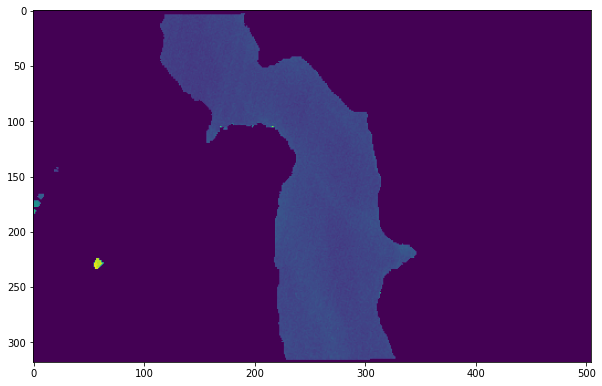

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(np.where(spm==-9999, 0, spm))

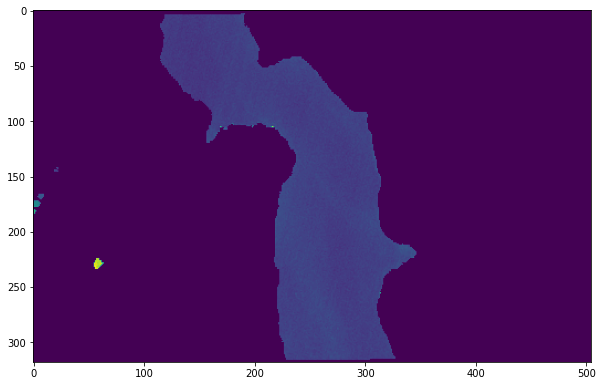

In [14]:
plt.figure(figsize=(10, 10))
plt.imshow(np.where(turb==-9999, 0, turb))

In [51]:
bright = 5.
red = gdal.Open(r'D:\Images\Output\Area_Tiete\SENTINEL2A_20190326-132829-354_L2A_T22KGA_C_V2-0\Red.tif').ReadAsArray()/10000*bright
green = gdal.Open(r'D:\Images\Output\Area_Tiete\SENTINEL2A_20190326-132829-354_L2A_T22KGA_C_V2-0\Green.tif').ReadAsArray()/10000*bright
blue = gdal.Open(r'D:\Images\Output\Area_Tiete\SENTINEL2A_20190326-132829-354_L2A_T22KGA_C_V2-0\Blue.tif').ReadAsArray()/10000*bright

for band in [red, green, blue]:
    band[band==-0.9999] = -9999

spm = ds.ReadAsArray()
red, green, blue = DWutils.rgb_burn_in(red=red,
                                       green=green,
                                       blue=blue,
                                       burn_in_array=spm,
                                       color=None,
                                       min_value=5,
                                       max_value=10,
                                       colormap='jet',
                                       fade=1,
                                       uniform_distribution=False,
                                       no_data_value=-9999,
                                       valid_value=1,
                                       transp=0)

In [52]:
cube = np.stack([red, green, blue], axis=2)

In [53]:
cube[cube==-9999] = np.nan

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


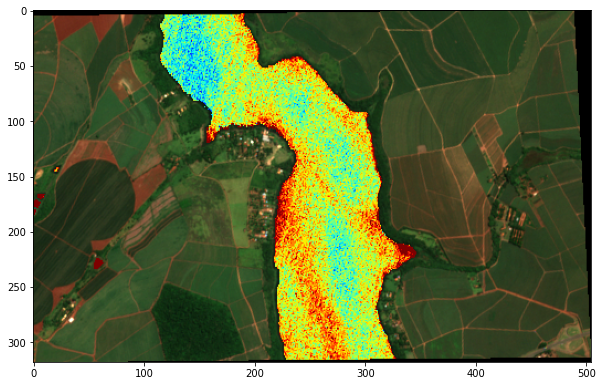

In [54]:
plt.figure(figsize=(10, 10))
plt.imshow(cube)

In [50]:
ds.ResetReading??

Signature: ds.ResetReading(*args)
Source:   
    def ResetReading(self, *args):
        """ResetReading(Dataset self)"""
        return _gdal.Dataset_ResetReading(self, *args)
File:      d:\programs\anaconda\envs\waterdetect\lib\site-packages\osgeo\gdal.py
Type:      method
